In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/ML/bf3_data_jul21_dec21.xlsx'
df = pd.read_excel(path)

In [ ]:
df.head()

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_TEMP2,TOP_TEMP3,TOP_TEMP4,TOP_SPRAY,TOP_TEMP,TOP_PRESS_1,CO,CO2,H2,SKIN_TEMP_AVG
0,01-07-21 00:10,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,135.0,107.0,130.0,0.0,121.0,2.0,22.22,21.00,3.88,69.940478
1,01-07-21 00:20,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,143.0,109.0,128.0,0.0,125.0,1.0,22.56,21.00,3.94,71.454476
2,01-07-21 00:30,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,138.0,110.0,124.0,0.0,124.0,1.0,22.49,21.08,3.94,70.579462
3,01-07-21 00:40,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,128.0,102.0,110.0,0.0,115.0,1.0,22.36,21.13,3.99,70.179791
4,01-07-21 00:50,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,139.0,112.0,124.0,0.0,125.0,1.0,22.25,21.30,4.10,70.728470


In [ ]:
df.isna().sum()

DATE_TIME           0
CB_FLOW          2665
CB_PRESS           32
CB_TEMP            32
STEAM_FLOW       2665
STEAM_TEMP         32
STEAM_PRESS        32
O2_PRESS           32
O2_FLOW          2665
O2_PER             32
PCI              2665
ATM_HUMID          32
HB_TEMP          3817
HB_PRESS         2746
TOP_PRESS        2665
TOP_TEMP1          32
TOP_TEMP2          32
TOP_TEMP3          32
TOP_TEMP4          32
TOP_SPRAY          32
TOP_TEMP           32
TOP_PRESS_1      2665
CO               2665
CO2              2665
H2               2665
SKIN_TEMP_AVG      32
dtype: int64

In [ ]:
df.drop(['TOP_TEMP1', 'TOP_TEMP2','TOP_TEMP3','TOP_TEMP4','TOP_PRESS_1'], axis=1, inplace= True)
df.DATE_TIME = pd.to_datetime(df.DATE_TIME, format = "%d-%m-%y %H:%M")
df.head()

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,ATM_HUMID,HB_TEMP,HB_PRESS,TOP_PRESS,TOP_SPRAY,TOP_TEMP,CO,CO2,H2,SKIN_TEMP_AVG
0,2021-07-01 00:10:00,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,24.56,1060.0,2.99,1.50,0.0,121.0,22.22,21.00,3.88,69.940478
1,2021-07-01 00:20:00,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,24.52,1058.0,2.99,1.49,0.0,125.0,22.56,21.00,3.94,71.454476
2,2021-07-01 00:30:00,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,24.53,1058.0,2.99,1.49,0.0,124.0,22.49,21.08,3.94,70.579462
3,2021-07-01 00:40:00,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,25.06,1057.0,2.99,1.49,0.0,115.0,22.36,21.13,3.99,70.179791
4,2021-07-01 00:50:00,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,25.36,1057.0,2.94,1.49,0.0,125.0,22.25,21.30,4.10,70.728470


In [ ]:
df.drop(df[df['SKIN_TEMP_AVG'].isna()].index, axis =0, inplace= True)
df.isna().sum()

DATE_TIME           0
CB_FLOW          2633
CB_PRESS            0
CB_TEMP             0
STEAM_FLOW       2633
STEAM_TEMP          0
STEAM_PRESS         0
O2_PRESS            0
O2_FLOW          2633
O2_PER              0
PCI              2633
ATM_HUMID           0
HB_TEMP          3785
HB_PRESS         2714
TOP_PRESS        2633
TOP_SPRAY           0
TOP_TEMP            0
CO               2633
CO2              2633
H2               2633
SKIN_TEMP_AVG       0
dtype: int64

<Axes: >

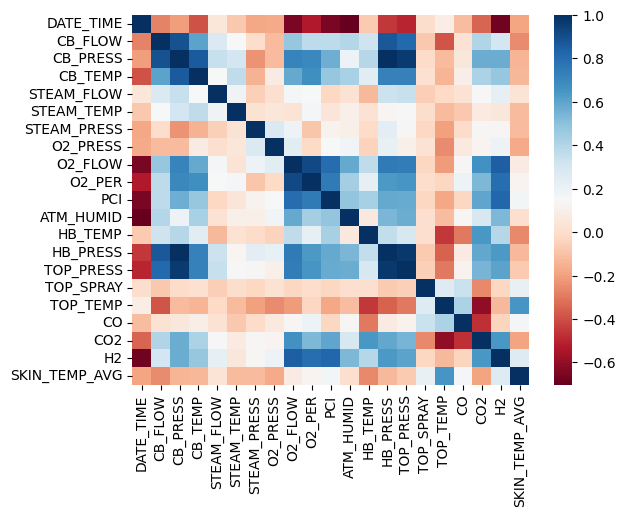

In [ ]:
sns.heatmap(df.corr(),cmap='RdBu')

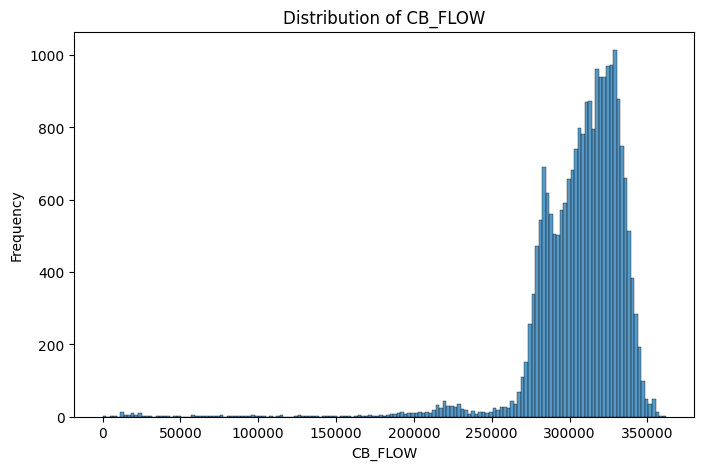

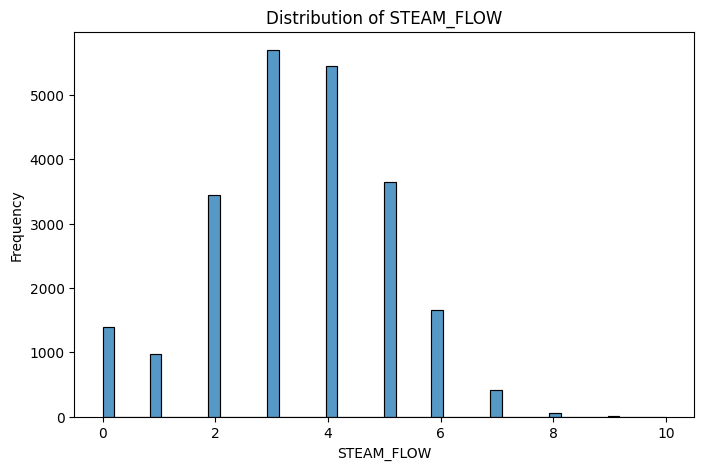

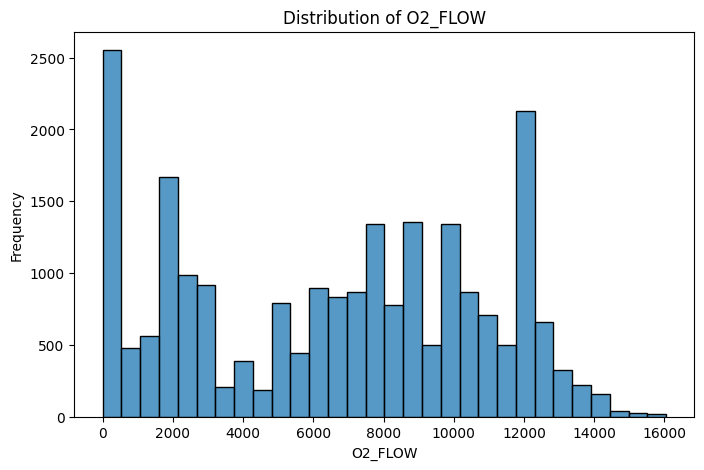

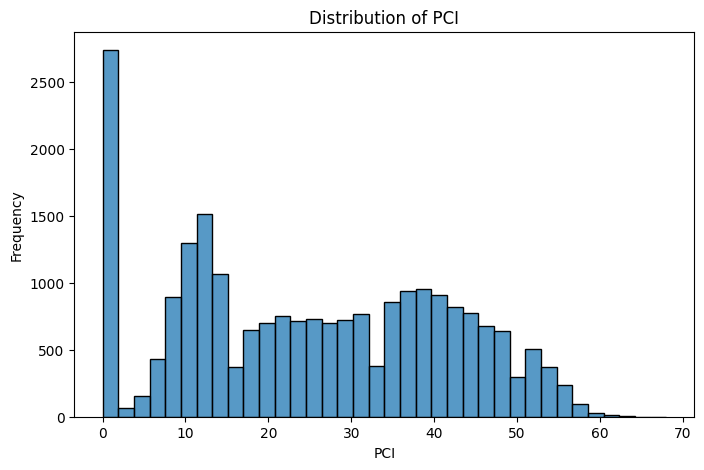

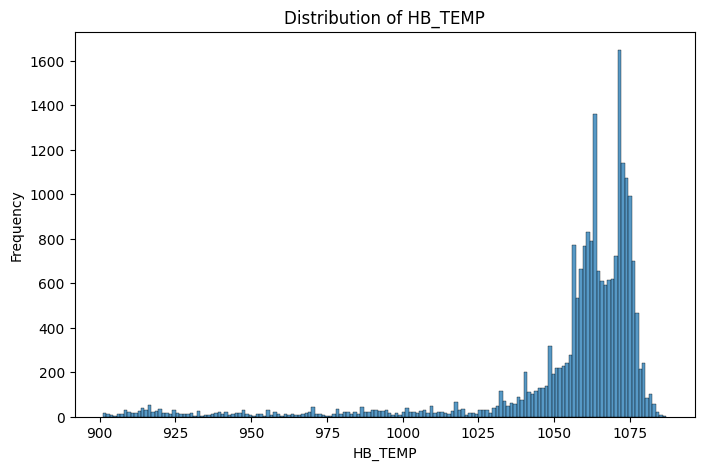

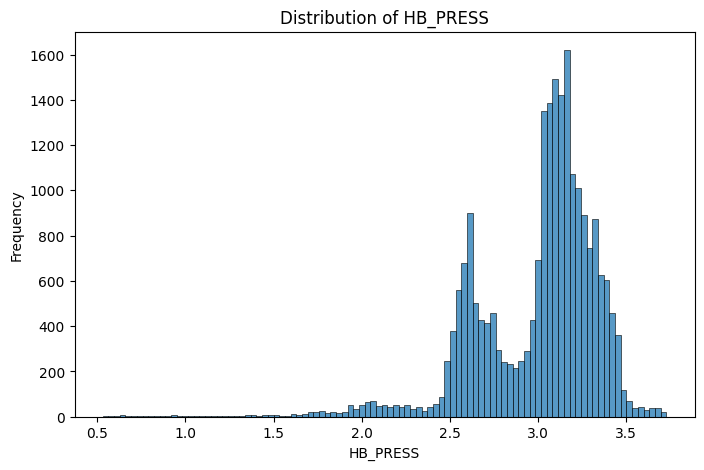

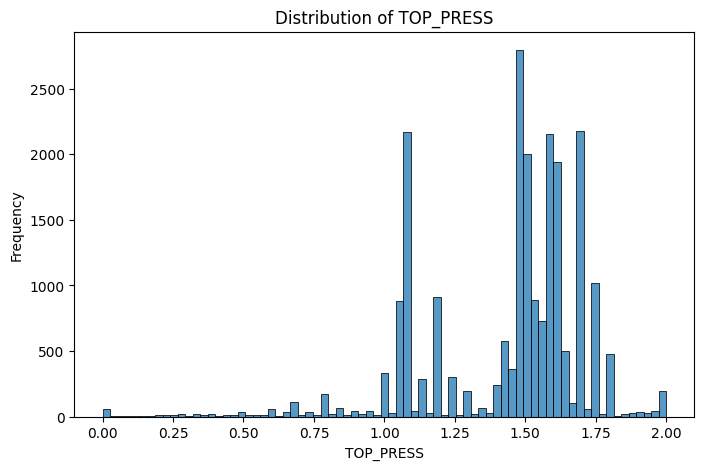

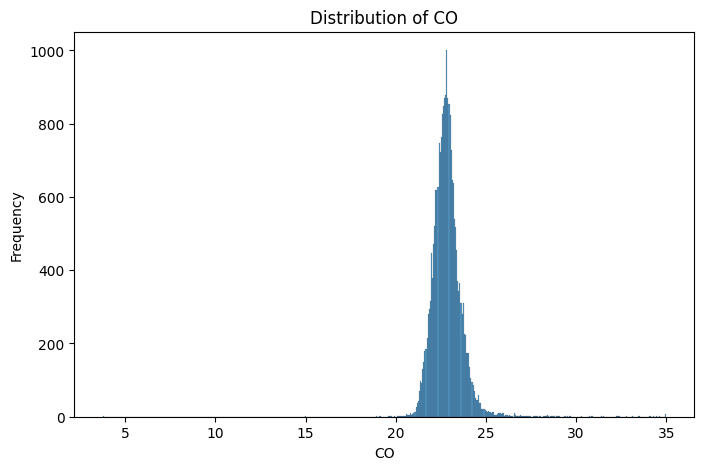

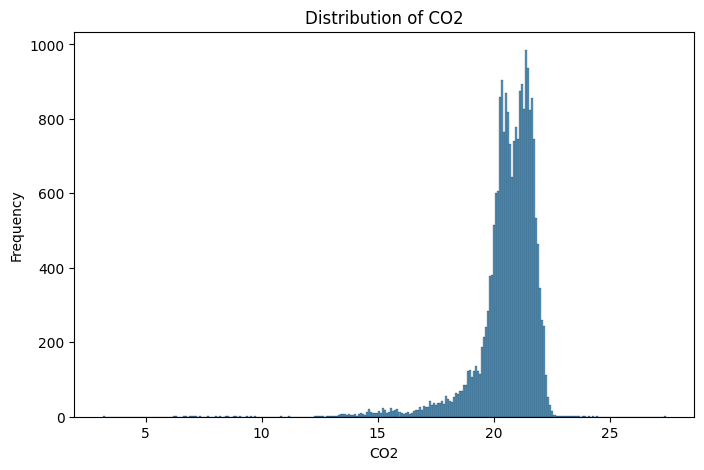

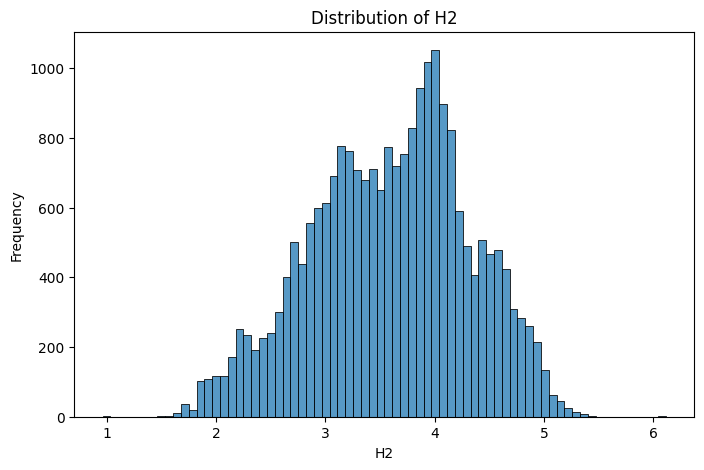

In [ ]:
for column in df.columns:
  if df.isna().sum()[column] !=0:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins='fd')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
from sklearn.impute import KNNImputer
df_new = df.copy(deep = True)
imputer = KNNImputer(n_neighbors = 6) # n_neighbors based on 1hr

df_new.loc[:, [column for column in df_new.columns if column != 'DATE_TIME']] = imputer.fit_transform(df_new.loc[:, [column for column in df_new.columns if column != 'DATE_TIME']])

# Rounding off the values to keep the column values discrete in nature
df_new.loc[:, ['STEAM_FLOW',]] = np.round(df_new.loc[:, ['STEAM_FLOW',]])

df_new.isna().sum()

DATE_TIME        0
CB_FLOW          0
CB_PRESS         0
CB_TEMP          0
STEAM_FLOW       0
STEAM_TEMP       0
STEAM_PRESS      0
O2_PRESS         0
O2_FLOW          0
O2_PER           0
PCI              0
ATM_HUMID        0
HB_TEMP          0
HB_PRESS         0
TOP_PRESS        0
TOP_SPRAY        0
TOP_TEMP         0
CO               0
CO2              0
H2               0
SKIN_TEMP_AVG    0
dtype: int64

In [ ]:
df = df_new.copy(deep = True)

In [ ]:
feature_cols = ['SKIN_TEMP_AVG_1', 'SKIN_TEMP_AVG_2', 'SKIN_TEMP_AVG_3', 'SKIN_TEMP_AVG_4']

for i in range(1, 5):
    df[feature_cols[i-1]] = df['SKIN_TEMP_AVG'].shift(-6*i)
df.head()

,DATE_TIME,CB_FLOW,CB_PRESS,CB_TEMP,STEAM_FLOW,STEAM_TEMP,STEAM_PRESS,O2_PRESS,O2_FLOW,O2_PER,...,TOP_SPRAY,TOP_TEMP,CO,CO2,H2,SKIN_TEMP_AVG,SKIN_TEMP_AVG_1,SKIN_TEMP_AVG_2,SKIN_TEMP_AVG_3,SKIN_TEMP_AVG_4
0,2021-07-01 00:10:00,311727.0,3.15,129.0,4.0,213.0,3.34,3.20,7296.0,23.08,...,0.0,121.0,22.22,21.00,3.88,69.940478,73.583364,77.198904,82.604995,84.877672
1,2021-07-01 00:20:00,315163.0,3.16,129.0,4.0,209.0,3.35,3.20,7829.0,23.08,...,0.0,125.0,22.56,21.00,3.94,71.454476,74.666066,78.518159,84.475989,83.397999
2,2021-07-01 00:30:00,314595.0,3.16,128.0,4.0,205.0,3.35,3.21,7904.0,23.08,...,0.0,124.0,22.49,21.08,3.94,70.579462,75.008361,80.865417,84.880888,83.368013
3,2021-07-01 00:40:00,312465.0,3.16,127.0,4.0,200.0,3.35,3.21,7919.0,23.08,...,0.0,115.0,22.36,21.13,3.99,70.179791,75.799102,82.564532,84.282448,84.592822
4,2021-07-01 00:50:00,302981.0,3.11,126.0,4.0,194.0,3.29,3.16,7938.0,23.08,...,0.0,125.0,22.25,21.30,4.10,70.728470,77.342288,82.636160,84.636354,83.540342


In [ ]:
df.isna().sum()

DATE_TIME           0
CB_FLOW             0
CB_PRESS            0
CB_TEMP             0
STEAM_FLOW          0
STEAM_TEMP          0
STEAM_PRESS         0
O2_PRESS            0
O2_FLOW             0
O2_PER              0
PCI                 0
ATM_HUMID           0
HB_TEMP             0
HB_PRESS            0
TOP_PRESS           0
TOP_SPRAY           0
TOP_TEMP            0
CO                  0
CO2                 0
H2                  0
SKIN_TEMP_AVG       0
SKIN_TEMP_AVG_1     6
SKIN_TEMP_AVG_2    12
SKIN_TEMP_AVG_3    18
SKIN_TEMP_AVG_4    24
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

excluded_cols = feature_cols + ['DATE_TIME', 'SKIN_TEMP_AVG'] # Excluding the target features and the date time column
x = df[[x for x in df.columns if x not in excluded_cols]]
y = df['SKIN_TEMP_AVG']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(x)
target_scaler = StandardScaler()
scaled_target = target_scaler.fit_transform(y.values.reshape(-1, 1))

df_feat= pd.DataFrame(scaled_features, columns=df.columns[1:-5])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score

x_train, x_test, y_train, y_test = train_test_split(scaled_features, scaled_target, test_size=0.2, random_state = 42)
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print( mae,r2)

0.4485816196066207 0.6166183957250413


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
best_degree = 1
best_val_mae = float('inf')

for degree in range(1, 7):
    # Transform features to polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(x_train)
    X_poly_val = poly.transform(x_val)

    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predict on the validation set
    y_val_pred = model.predict(X_poly_val)

    # Calculate validation metrics
    val_mae = mean_absolute_error(y_val, y_val_pred)'alidation MAE
    if val_mae < best_val_mae:
        best_val_mae = val_mae
        best_degree = degree

print(f"Best degree: {best_degree} with Validation MAE: {best_val_mae}")

# Final model training with the best degree
poly = PolynomialFeatures(degree=best_degree)
X_poly_train = poly.fit_transform(x_train)
X_poly_test = poly.transform(x_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)

# Evaluate the final model on the test set
y_test_pred = model.predict(X_poly_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MAE: {test_mae}, Test R2: {test_r2}")



Degree 1: Validation MAE = 12.093608812241254, Validation R2 = 0.6169981968446446
Degree 2: Validation MAE = 9.974925300889366, Validation R2 = 0.7612442275278755
Degree 3: Validation MAE = 9.110138415911207, Validation R2 = 0.41196693103896287


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_params = {
    'regressor__n_neighbors' : [x for x in range(1, 10)],
    'regressor__weights' : ['uniform', 'distance'],
    'regressor__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'regressor__leaf_size' : [x for x in range(10, 51, 10)]
}

knn_pipeline = Pipeline([('regressor', KNeighborsRegressor())])
knn_grid_search = GridSearchCV(knn_pipeline, knn_params, cv = 5, scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'), refit = 'neg_mean_squared_error', n_jobs = -1)
knn_grid_search.fit(x_train, y_train)

print(knn_grid_search.best_params_)
print(knn_grid_search.best_score_)


KeyboardInterrupt: 

In [ ]:
knn_model = Pipeline([('scaler', MinMaxScaler()), ('regressor', KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto', leaf_size=10, p=1))]).fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

print(mean_absolute_error(y_test, y_pred_knn))
print(r2_score(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_param_grid = {
    'regressor__n_estimators' : [x for x in range(100, 600, 100)],
    'regressor__max_depth' : [None, 10, 20, 30, 40, 50],
    'regressor__max_features' : ['auto', 'sqrt', 'log2', 0.3, 0.6, 0.9],
    'regressor__min_samples_split' : [2, 5, 10],
    'regressor__min_samples_leaf' : [1, 2, 4],
}

rf_pipeline = Pipeline([('scaler', StandardScaler()), ('regressor', RandomForestRegressor(random_state=42))])

rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv = 5, scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'), refit = 'neg_mean_squared_error', n_jobs = -1)
rf_grid_search.fit(x_train, y_train)

print(rf_grid_search.best_params_)
print(rf_grid_search.best_score_)


NameError: name 'Pipeline' is not defined

In [ ]:
rf_model = Pipeline(steps = [('scaler', MinMaxScaler()), ('regressor', RandomForestRegressor(max_depth=30, max_features = 0.3, n_estimators=900, random_state=42))]).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

NameError: name 'RandomForestRegressor' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer= Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stop = EarlyStopping(monitor= 'val_loss', mode= 'min', verbose=1, patience =25)

In [ ]:
model.fit(x_train,y_train, epochs= 600, validation_split= 0.2, callbacks= [early_stop])


Epoch 1/600
507/507 [==============================] - 6s 3ms/step - loss: 0.3673 - mean_absolute_error: 0.4370 - val_loss: 0.2567 - val_mean_absolute_error: 0.3632
Epoch 2/600
507/507 [==============================] - 2s 3ms/step - loss: 0.2745 - mean_absolute_error: 0.3826 - val_loss: 0.2700 - val_mean_absolute_error: 0.3847
Epoch 3/600
507/507 [==============================] - 2s 3ms/step - loss: 0.2541 - mean_absolute_error: 0.3648 - val_loss: 0.2048 - val_mean_absolute_error: 0.3293
Epoch 4/600
507/507 [==============================] - 2s 3ms/step - loss: 0.2304 - mean_absolute_error: 0.3497 - val_loss: 0.1965 - val_mean_absolute_error: 0.3237
Epoch 5/600
507/507 [==============================] - 2s 3ms/step - loss: 0.2124 - mean_absolute_error: 0.3359 - val_loss: 0.1992 - val_mean_absolute_error: 0.3168
Epoch 6/600
507/507 [==============================] - 3s 5ms/step - loss: 0.1931 - mean_absolute_error: 0.3236 - val_loss: 0.1884 - val_mean_absolute_error: 0.3021
Epoch 7/60

In [ ]:
pred = model.predict(x_test)
mae = mean_absolute_error(y_test, pred)
print(f'Mean Absolute Error: {mae}')
r2 = r2_score(y_test, pred)
print(f'R-squared Score: {r2}')


159/159 [==============================] - 0s 1ms/step
Mean Absolute Error: 0.14162652788987035
R-squared Score: 0.9562747376407887


In [ ]:
for i in range(1,5):
    X_nxt_hr = x.copy(deep = True)
    if i-1 != 0:
        X_nxt_hr.loc[:, 'SKIN_TEMP_AVG'] = df['SKIN_TEMP_AVG_' + str(i-1)]
    else:
        X_nxt_hr.loc[:, 'SKIN_TEMP_AVG'] = df['SKIN_TEMP_AVG']

    y_nxt_hr = df['SKIN_TEMP_AVG_' + str(i)]

    X_train, X_test, Y_train, Y_test = train_test_split(X_nxt_hr, y_nxt_hr, test_size=0.2, random_state=42)
    Y_pred_knn = knn_model.predict(X_test)

    print('r2: ' + str(r2_score(y_test, y_pred_knn)))
    print('mae: ' + str(mean_absolute_error(Y_test, Y_pred_knn)))
    print('mse: ' + str(mean_squared_error(Y_test, Y_pred_knn)))

NameError: name 'x' is not defined

In [ ]:
import pickle

In [ ]:
with open('knn.pkl', 'wb') as file:
  pickle.dump(knn_model, file)

In [ ]:
pip install flask-ngrok

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template